___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://dinhanhthi.com/img/post/ML/random-forest-decision-tree/r2.jpg" width="350px" height="180px" />


# <font color= #8A0829> Data modelling lab </font>
- <Strong> Teacher: Sara Eugenia Rodríguez </Strong>
- <Strong> Year: </Strong>: 2023
___

<p style="text-align:right;"> Image from: https://dinhanhthi.com/img/post/ML/random-forest-decision-tree/r2.jpg</p>

### <font color= #2E9AFE> Tree models </font>


Trees are a set of conditions of the form: if-then. They divide data into a series of predictors



**Examples:** In a problem with 2 predictors: "A" and "B", a et of conditions

If predictor "A" >= 1.7 then
If predictor "B" >= 200 then prediction = 1.3
Si el predictor 'A' >= 1.7, entonces
Else, prediction = 2.5

This conditions are spliting data into 3 segments

**Hiperparameters to fit**
- Tree depth (max_depth)
- Minimun observations by split(min_samples_split)

**Disadvantages**

- Model inestability because, if data is changed, it makes significant changes in the tree structure


In [15]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeRegressor 

In [16]:
#create data
ColumnNames=['Hours','Calories', 'Weight']
DataValues= [[1.0,   2500,   95],[2.0,   2000,   85],[2.5,   1900,   83],[3.0,   1850,   81],[3.5,   1600,   80],[4.0,   1500,   78],
            [5.0,   1500,   77],[5.5,   1600,   80],[6.0,   1700,   75],[6.5,   1500,   70]]

GymData=pd.DataFrame(data=DataValues,columns=ColumnNames)
GymData.head()


,Hours,Calories,Weight
0,1.0,2500,95
1,2.0,2000,85
2,2.5,1900,83
3,3.0,1850,81
4,3.5,1600,80


In [17]:
#Separate Target Variable and Predictor Variables
TargetVariable='Weight'
Predictors=['Hours','Calories']
X=GymData[Predictors].values
y=GymData[TargetVariable].values

In [18]:
#split in train-test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
#Initialize model
model = DecisionTreeRegressor(random_state = 0)
#Train model
model.fit(x_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [20]:
# Predicting 
y_pred = model.predict(x_test)


In [21]:
# MSE
mse = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("\nMSE: ", mse)


MSE:  14.5


In [22]:
#R@
r2 = r2_score(y_test, y_pred)
print("\nMSE: ", r2)


MSE:  0.42000000000000004


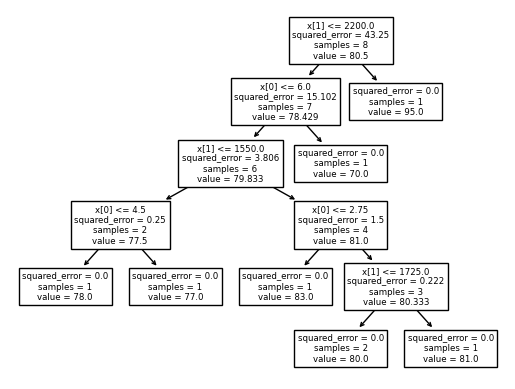

In [23]:
#Plot tree
from sklearn import tree
tree.plot_tree(model);

In [24]:
#Export tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("trees_gen/tree_multipredict")

'trees_gen/tree_multipredict.pdf'

As we see, tree is overfitted because it only has one record in each final leaf

**Advantages**

- Doesn't require scaling
- Can be used for non linear data
- Easy to visualize
- Easy to interpret


**Disadvantages**

- Computionally complex, specifically when using cross-validation to fit hiperparameters
- Small changes in the data could make significant changes in the tree structure